In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [26]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

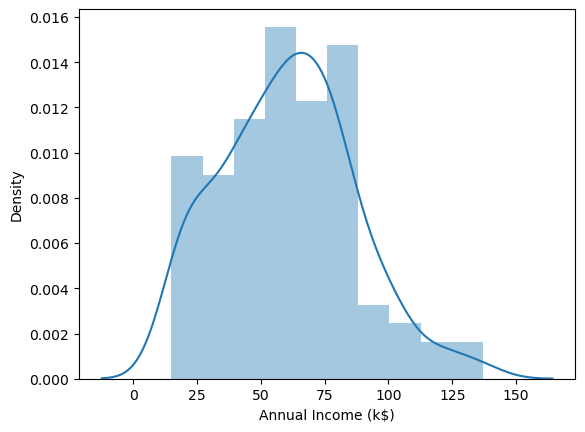

In [31]:
sns.distplot(df['Annual Income (k$)'])

<Axes: ylabel='Annual Income (k$)'>

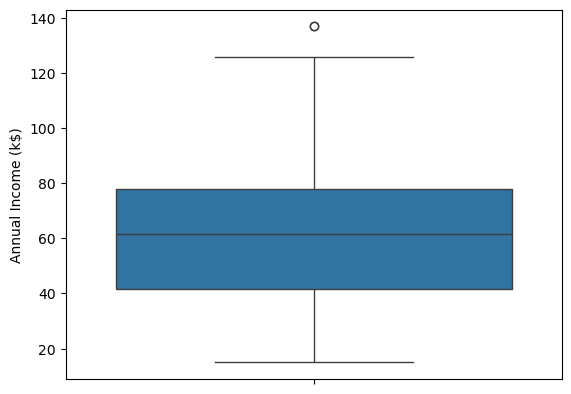

In [32]:
sns.boxplot(data=df,y='Annual Income (k$)')

In [33]:
iqr=df['Annual Income (k$)'].quantile(0.75)-df['Annual Income (k$)'].quantile(0.25)
df=df[(df['Annual Income (k$)']>(df['Annual Income (k$)'].quantile(0.25)-1.5*iqr))&(df['Annual Income (k$)']<(df['Annual Income (k$)'].quantile(0.75)+1.5*iqr))]

<Axes: ylabel='Annual Income (k$)'>

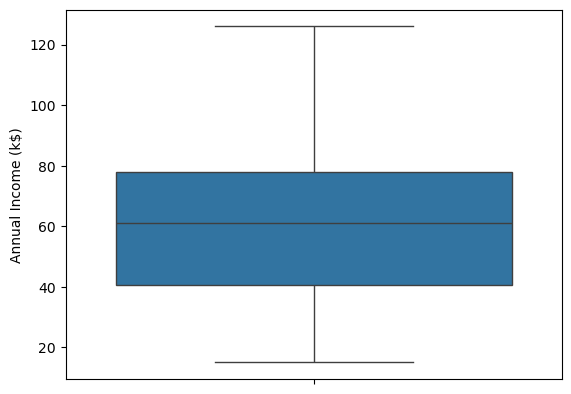

In [34]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: xlabel='Age', ylabel='Density'>

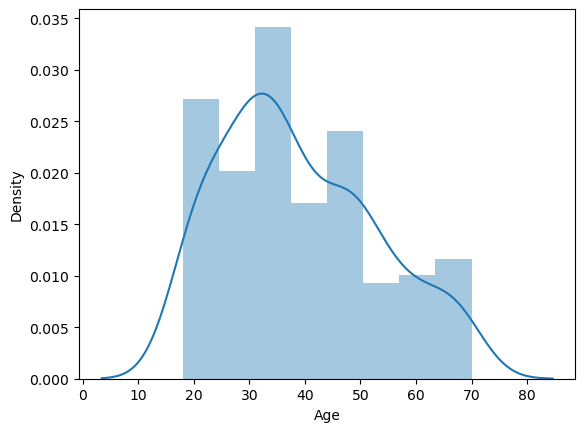

In [35]:
sns.distplot(df['Age'])

<Axes: ylabel='Age'>

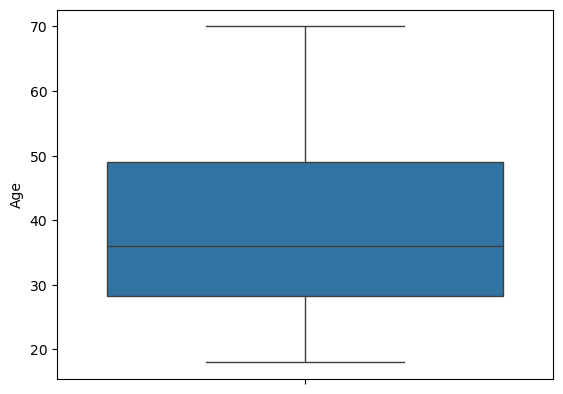

In [36]:
sns.boxplot(data=df,y='Age')

<Axes: ylabel='Spending Score (1-100)'>

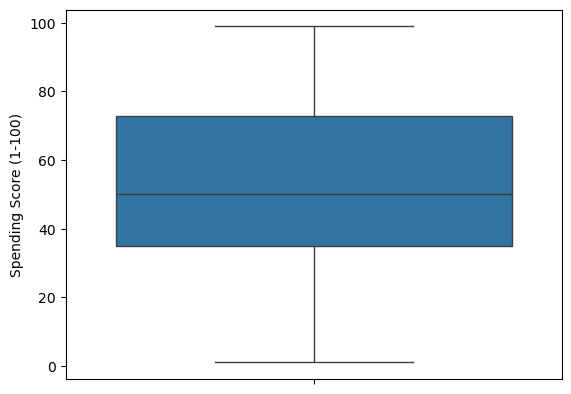

In [37]:
sns.boxplot(df['Spending Score (1-100)'])

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
high_income_threshold = df['Annual Income (k$)'].quantile(0.75)
low_income_threshold = df['Annual Income (k$)'].quantile(0.25)

high_spending_threshold = df['Spending Score (1-100)'].quantile(0.75)
low_spending_threshold = df['Spending Score (1-100)'].quantile(0.25)

def categorize_customer(row):
    if row['Annual Income (k$)'] >= high_income_threshold:
        if row['Spending Score (1-100)'] >= high_spending_threshold:
            return 'High Income, High Spending'
        elif row['Spending Score (1-100)'] <= low_spending_threshold:
            return 'High Income, Low Spending'
        else:
            return 'High Income, Medium Spending'
    elif row['Annual Income (k$)'] <= low_income_threshold:
        if row['Spending Score (1-100)'] >= high_spending_threshold:
            return 'Low Income, High Spending'
        elif row['Spending Score (1-100)'] <= low_spending_threshold:
            return 'Low Income, Low Spending'
        else:
            return 'Low Income, Medium Spending'
    else:
        if row['Spending Score (1-100)'] >= high_spending_threshold:
            return 'Medium Income, High Spending'
        elif row['Spending Score (1-100)'] <= low_spending_threshold:
            return 'Medium Income, Low Spending'
        else:
            return 'Medium Income, Medium Spending'

df['CustomerSegment'] = df.apply(categorize_customer, axis=1)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerSegment
0,1,Male,19,15,39,"Low Income, Medium Spending"
1,2,Male,21,15,81,"Low Income, High Spending"
2,3,Female,20,16,6,"Low Income, Low Spending"
3,4,Female,23,16,77,"Low Income, High Spending"
4,5,Female,31,17,40,"Low Income, Medium Spending"
...,...,...,...,...,...,...
193,194,Female,38,113,91,"High Income, High Spending"
194,195,Female,47,120,16,"High Income, Low Spending"
195,196,Female,35,120,79,"High Income, High Spending"
196,197,Female,45,126,28,"High Income, Low Spending"


In [40]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)
df.rename(columns={'Gender': 'Male'}, inplace=True)
df

,CustomerID,Male,Age,Annual Income (k$),Spending Score (1-100),CustomerSegment
0,1,True,19,15,39,"Low Income, Medium Spending"
1,2,True,21,15,81,"Low Income, High Spending"
2,3,False,20,16,6,"Low Income, Low Spending"
3,4,False,23,16,77,"Low Income, High Spending"
4,5,False,31,17,40,"Low Income, Medium Spending"
...,...,...,...,...,...,...
193,194,False,38,113,91,"High Income, High Spending"
194,195,False,47,120,16,"High Income, Low Spending"
195,196,False,35,120,79,"High Income, High Spending"
196,197,False,45,126,28,"High Income, Low Spending"


In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
train_index,test_index=next(sss.split(df,df['CustomerSegment']))
train_set=df.loc[train_index]
test_set=df.loc[test_index]
print(train_set.shape)
print(test_set.shape)
print(train_set['CustomerSegment'].value_counts())
print(test_set['CustomerSegment'].value_counts())
X_train=train_set.drop(['CustomerSegment'],axis=1)
y_train=train_set['CustomerSegment']
X_test=test_set.drop(['CustomerSegment'],axis=1)
y_test=test_set['CustomerSegment']


(138, 6)
(60, 6)
CustomerSegment
Medium Income, Medium Spending    54
High Income, Low Spending         17
High Income, High Spending        15
Low Income, Low Spending          14
Low Income, High Spending         12
Low Income, Medium Spending        8
Medium Income, High Spending       8
Medium Income, Low Spending        7
High Income, Medium Spending       3
Name: count, dtype: int64
CustomerSegment
Medium Income, Medium Spending    23
High Income, Low Spending          7
Low Income, High Spending          6
High Income, High Spending         6
Low Income, Low Spending           6
Low Income, Medium Spending        4
Medium Income, High Spending       3
Medium Income, Low Spending        3
High Income, Medium Spending       2
Name: count, dtype: int64


In [42]:

model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


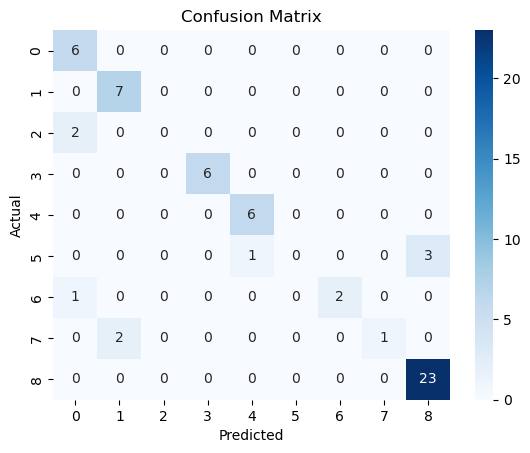

                                precision    recall  f1-score   support

    High Income, High Spending       0.67      1.00      0.80         6
     High Income, Low Spending       0.78      1.00      0.88         7
  High Income, Medium Spending       0.00      0.00      0.00         2
     Low Income, High Spending       1.00      1.00      1.00         6
      Low Income, Low Spending       0.86      1.00      0.92         6
   Low Income, Medium Spending       0.00      0.00      0.00         4
  Medium Income, High Spending       1.00      0.67      0.80         3
   Medium Income, Low Spending       1.00      0.33      0.50         3
Medium Income, Medium Spending       0.88      1.00      0.94        23

                      accuracy                           0.85        60
                     macro avg       0.69      0.67      0.65        60
                  weighted avg       0.78      0.85      0.80        60



In [43]:

from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))



Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
                                precision    recall  f1-score   support

    High Income, High Spending       1.00      1.00      1.00         6
     High Income, Low Spending       1.00      0.86      0.92         7
  High Income, Medium Spending       0.67      1.00      0.80         2
     Low Income, High Spending       1.00      1.00      1.00         6
      Low Income, Low Spending       1.00      1.00      1.00         6
   Low Income, Medium Spending       1.00      0.75      0.86         4
  Medium Income, High Spending       1.00      1.00      1.00         3
   Medium Income, Low Spending       0.75      1.00      0.86         3
Medium Income, Medium Spending       0.96      0.96      0.96        23

                      accuracy                           0.95        60
                     macro avg       0.93      0.95      0.93        60
                  weighted avg       0.96      0.95      0.95       